## Video Fast Style Transfer (TF-Hub)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 將 tensor 轉換成圖片矩陣
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return tensor

In [3]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [4]:
def process_img(img):
    max_dim = 512
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [5]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

## Download style image

In [6]:
style_path = tf.keras.utils.get_file('style.jpg','https://i.imgur.com/bqNSFt6.jpg')

221184/208597 [===============================] - 0s 1us/step


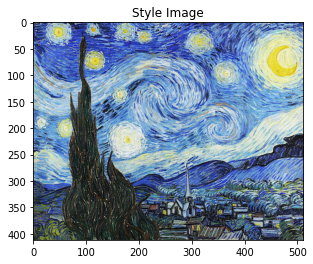

In [7]:
style_image = load_img(style_path)

imshow(style_image, 'Style Image')

## Upload video

In [8]:
from google.colab import files
uploaded = files.upload()
# get filename
fileName = list(uploaded.keys())[0]

Saving test.MOV to test.MOV


## Load style transfer model

In [9]:
import tensorflow_hub as hub

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [10]:
import imageio

reader = imageio.get_reader(fileName)
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('./output.mp4', fps=fps)

In [11]:
%%time
print('----Start transfer-----')
for im in reader:
    im = np.array(im, dtype='f')/255
    img = process_img(im)
    stylized_image = hub_model(tf.constant(img), tf.constant(style_image))[0]
    result = tensor_to_image(stylized_image)
    writer.append_data(result)
writer.close()

----Start transfer...-----
CPU times: user 13 s, sys: 991 ms, total: 14 s
Wall time: 41.8 s


## Show Result

In [12]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 300):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video('./output.mp4')